In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style = 'white')
sns.set (style= 'whitegrid', color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [2]:
data = pd.read_csv(r"C:\Users\gradadm09\Desktop\Natalie\Wayfair-Babson_HackathonData 2019.csv")

In [3]:
data.head()

,Purchased,VisitDate,UniqueVisitID,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,State,Gender,IncomeRange,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
0,0,7/1/2017,2.014240e+15,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Mac OS X,NY,Female,100to250k,0,0,1,0,0,0,0
1,0,7/1/2017,2.909700e+15,New Visitor,Phone,WebSearch,Safari,iOS,NaN,NaN,NaN,1,0,9,0,230,0,0
2,0,7/1/2017,2.987400e+15,New Visitor,Web,WebSearch,Chrome,Windows,NaN,NaN,NaN,0,0,28,0,10412,0,0
3,0,7/1/2017,6.875970e+15,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,WA,Female,100to250k,1,1,8,1,430,0,0
4,0,7/1/2017,1.153490e+16,New Visitor,Phone,ThirdPartyAds,Safari,iOS,NaN,NaN,NaN,1,1,9,0,1158,0,0


In [4]:
data.describe()

,Purchased,UniqueVisitID,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
count,992977.000000,9.929770e+05,992977.000000,992977.000000,992977.000000,992977.000000,992977.000000,992977.000000,992977.000000
mean,0.025445,4.608987e+18,0.509052,0.139695,13.975567,0.366073,1436.925027,0.046510,0.106376
std,0.157472,2.661529e+18,0.499918,0.346671,23.037259,0.481730,3216.872703,0.210586,0.308319
min,0.000000,1.328640e+13,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.304610e+18,0.000000,0.000000,3.000000,0.000000,38.000000,0.000000,0.000000
50%,0.000000,4.607860e+18,1.000000,0.000000,7.000000,0.000000,237.000000,0.000000,0.000000
75%,0.000000,6.913870e+18,1.000000,0.000000,16.000000,1.000000,1071.000000,0.000000,0.000000
max,1.000000,9.223330e+18,1.000000,1.000000,1217.000000,1.000000,86896.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992977 entries, 0 to 992976
Data columns (total 18 columns):
Purchased               992977 non-null int64
VisitDate               992977 non-null object
UniqueVisitID           992977 non-null float64
VisitorGroup            992977 non-null object
PlatformUsed            992977 non-null object
VisitSource             992977 non-null object
BrowserName             992977 non-null object
OSName                  992977 non-null object
State                   408261 non-null object
Gender                  639596 non-null object
IncomeRange             383272 non-null object
ViewedProductInVisit    992977 non-null int64
ViewedSaleInVisit       992977 non-null int64
TotalPageViews          992977 non-null int64
PlacedSearch            992977 non-null int64
SecondsOnSite           992977 non-null int64
ClickedBanner           992977 non-null int64
AddedToBasket           992977 non-null int64
dtypes: float64(1), int64(8), object(9)
memory usa

In [6]:
data.columns

Index(['Purchased', 'VisitDate', 'UniqueVisitID', 'VisitorGroup',
       'PlatformUsed', 'VisitSource', 'BrowserName', 'OSName', 'State',
       'Gender', 'IncomeRange', 'ViewedProductInVisit', 'ViewedSaleInVisit',
       'TotalPageViews', 'PlacedSearch', 'SecondsOnSite', 'ClickedBanner',
       'AddedToBasket'],
      dtype='object')

In [7]:
data.tail()

,Purchased,VisitDate,UniqueVisitID,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,State,Gender,IncomeRange,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
992972,0,7/8/2017,9.203610e+18,New Visitor,Phone,ThirdPartyAds,Safari,iOS,NaN,NaN,NaN,1,0,8,0,993,0,0
992973,0,7/8/2017,9.208420e+18,New Visitor,Web,WebSearch,Safari,iOS,NaN,NaN,NaN,0,1,3,0,254,0,0
992974,0,7/8/2017,9.209280e+18,New Visitor,Phone,WebSearch,Safari,iOS,NaN,NaN,NaN,0,0,1,0,0,0,0
992975,0,7/8/2017,9.213680e+18,Prior Visitor,Phone,WebSearch,Safari,iOS,NC,Male,100to250k,1,0,24,1,2077,0,1
992976,0,7/8/2017,9.219090e+18,Prior Visitor,Phone,ThirdPartyAds,Chrome,Android,NaN,Unknown,NaN,1,0,20,0,8730,0,0


In [8]:
# Drop rows where income data is not available
data_income = data.dropna(axis = 0, subset=['IncomeRange']) 

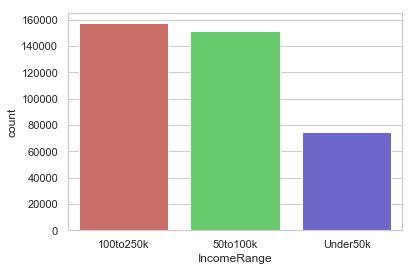

In [9]:
sns.countplot( x = 'IncomeRange', data = data_income, palette = 'hls')
# There are more high and med income people in the platform compared to low income people

In [10]:
# Divide data set into 3 groups
income_group = ['High_income','Med_income','Low_income']
High_income = data_income[data_income['IncomeRange'] == '100to250k'].drop(['IncomeRange'],axis = 1)
Med_income = data_income[data_income['IncomeRange'] == '50to100k'].drop(['IncomeRange'],axis = 1)
Low_income = data_income[data_income['IncomeRange'] == 'Under50k'].drop(['IncomeRange'],axis = 1)

In [11]:
#  Analyze price sensitivity of each data set

In [12]:
High_income.head()

,Purchased,VisitDate,UniqueVisitID,VisitorGroup,PlatformUsed,VisitSource,BrowserName,OSName,State,Gender,ViewedProductInVisit,ViewedSaleInVisit,TotalPageViews,PlacedSearch,SecondsOnSite,ClickedBanner,AddedToBasket
0,0,7/1/2017,2.014240e+15,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Mac OS X,NY,Female,0,0,1,0,0,0,0
3,0,7/1/2017,6.875970e+15,Prior Visitor with Purchase,Phone,EmailFromWayfair,Safari,iOS,WA,Female,1,1,8,1,430,0,0
12,0,7/1/2017,4.360120e+16,Prior Visitor,Web,WebSearch,Safari,iOS,CA,Female,1,0,26,1,2785,0,1
27,0,7/1/2017,1.081290e+17,Prior Visitor with Purchase,Web,ThirdPartyAds,Chrome,Windows,NY,Unknown,0,0,1,0,117,0,0
29,0,7/1/2017,1.165150e+17,Prior Visitor with Purchase,Phone,WebSearch,Safari,iOS,TX,Female,1,0,78,0,5813,0,0


In [13]:
# Create dummy variables  
def create_dummy_income(df):
    category_vars= ['VisitorGroup', 'PlatformUsed', 'VisitSource',
       'BrowserName', 'OSName', 'Gender']
    df = pd.get_dummies(df, columns = category_vars, drop_first = True)
    return df
   
def logistic_model(df):    
    df = create_dummy_income(df)
    print(df.columns)
    logr = LogisticRegression()
    X = df.iloc[:,1:].values
    y = df.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 30)
    logr.fit(X_train,y_train)
    y_pred_test = logr.predict(X_test)
    y_pred_train = logr.predict(X_train)
    coefs = logr.coef_
    intercept = logr.intercept_        
    log_reg = sm.Logit(y_train, X_train)
    clf = log_reg.fit()
    column_names = list(df.columns)
    summary = clf.summary(xname = column_names[1:])
    #odd ratios only  
    print(summary)
    print(np.exp(clf.params))


In [14]:
logistic_model(High_income)

Index(['Purchased', 'VisitDate', 'UniqueVisitID', 'State',
       'ViewedProductInVisit', 'ViewedSaleInVisit', 'TotalPageViews',
       'PlacedSearch', 'SecondsOnSite', 'ClickedBanner', 'AddedToBasket',
       'VisitorGroup_Prior Visitor',
       'VisitorGroup_Prior Visitor with Purchase', 'PlatformUsed_Web',
       'VisitSource_ThirdPartyAds', 'VisitSource_WebSearch',
       'BrowserName_Microsoft Edge', 'BrowserName_Safari', 'OSName_Chrome OS',
       'OSName_Linux', 'OSName_Mac OS X', 'OSName_Other/Unknown',
       'OSName_Windows', 'OSName_iOS', 'Gender_Male', 'Gender_Unknown'],
      dtype='object')


C:\Users\gradadm09\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: '7/5/2017'

In [ ]:
logistic_model(Med_income)

In [ ]:
# With Med income people, the Clicked to Banner  is useful in explaining model
# Clicking rate increased the odd of purchase by 0.81 ( decrease)
# Among Med income people,gender does not matter
# Among Med income people, Web is useful in explaining whether you will purchase or not
# if you are using Web, the odd that you purchase is 1.2 higher compared to using phone 

In [ ]:
logistic_model(Low_income)

In [ ]:
# With low income people, ViewedSaleinVisit, Seconds on Site, whether they use Web or not, Gender, any OS 
# are not useful in explaining whether they will purchase or not
# With low income people, the Clicked Banner rate increase the odd of purchase by 0.75 ( decrease)
# Among Low income people, if you are male, the odd that you purchase is 0.960 compared to women ( lower than women) 
# Among Low income people, if you are using Web, the odd that you purchase is 1.136 compared to using phone 

In [ ]:
# Assume Viewed Sales meaning more interested in Sales
sns.countplot(x = 'ViewedSaleInVisit', data = data_income, hue = 'IncomeRange', palette = 'hls')

In [ ]:
sns.barplot( x = 'IncomeRange', y = 'ViewedSaleInVisit',data = data_income, palette = 'hls')
# Low income people are more intested in Sales bc they have higher rate of viewing Sales 
#( high-income:16.5, Med income: 18.5, low income: 20%

In [ ]:
sns.barplot( x = 'IncomeRange', y = 'Purchased',data = data_income, palette = 'hls')


In [ ]:
 sns.barplot( x = 'IncomeRange', y = 'ClickedBanner',data = data_income, palette = 'hls')
# Low income people are more likely to Click on the Banner (high-income:5.2%, Med income:5.5%, low income: 6% )
# This means the offer sales and using Banner will work better with low income people

In [ ]:
sns.barplot( x = 'PlatformUsed', y = 'ClickedBanner',data = data, palette = 'hls')
# People Click more when they are on the Web ( 5% Web vs. 4.1 % Phone)

In [ ]:
#sns.barplot( x = 'PlatformUsed', y = 'AddedToBasket',data = data, palette = 'hls')
# Among all people, people Add to Basket almost at the same rate when they are on the phone and on the web, both 14.2 %

In [ ]:
sns.barplot( x = 'PlatformUsed', y = 'Purchased',data = data, palette = 'hls')
# Among all people, people buy a lot more when they are on the Web( 3.2 %) compared to when they are on the phone (1.9%)
# same add to basket rate, but much lower purchase rate

In [ ]:
sns.barplot( x = 'Gender', y = 'Purchased',data = data, palette = 'hls')
# Among all, people purchase more when they are Male, 0.055 vs 0.07 ( 5.5% vs 7.1%)

In [ ]:
data_income.columns

In [ ]:
# Split data set into phone user and web user
phone_user = data[data['PlatformUsed'] == 'Phone']
web_user = data[data['PlatformUsed'] == 'Web']

In [ ]:
sns.barplot( x = 'Gender', y = 'Purchased',data = phone_user , palette = 'hls')
# Among all phone users, male purchase slightly more than women (0.054 vs. 0.047) or 5.4% vs 4.7%

In [ ]:
sns.barplot( x = 'IncomeRange', y = 'Purchased',data = phone_user , palette = 'hls')
# For phone user, low income people buy slightly a little more ( 5.8% compared to 5.2% of high or mid income)

In [ ]:
sns.barplot( x = 'Gender', y = 'ClickedBanner',data = phone_user , palette = 'hls')
# Among all phone users, male have the same click banner rate as women, 5%
# Male purchase more if they are using phone, they have the same rate of clicking like women on the banner.

In [ ]:
#sns.barplot( x = 'Gender', y = 'ClickedBanner',data = web_user , palette = 'hls')
# Among all web users, women click to banner more( 6.1%) while men click on banner less 5.1%
# Male purchase more if they are using web, but they don't click Banner on the webas much as women.


In [ ]:
# sns.barplot( x = 'Gender', y = 'Purchased',data = web_user , palette = 'hls')
# Male purchase more if they are using web 8.1% vs. 6.1% ( women)

In [ ]:
# Split by gender
data_gender = data.dropna(axis = 0, subset = ['Gender'])
male = data_gender[data_gender['Gender'] == 'Male'].drop(['Gender'], axis = 1)
female = data_gender[data_gender['Gender'] == 'Female'].drop(['Gender'], axis =1)

In [ ]:
def create_dummy_gender(df):
    category_vars= ['VisitorGroup', 'PlatformUsed', 'VisitSource','BrowserName', 'OSName','IncomeRange']
    df = pd.get_dummies(df, columns = category_vars, drop_first = True)
    return df
    
def logistic_model_gender(df):    
    df = create_dummy_gender(df)
    print(df.columns)
    logr = LogisticRegression()
    X = df.iloc[:,1:].values
    y = df.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 30)
    logr.fit(X_train,y_train)
    y_pred_test = logr.predict(X_test)
    y_pred_train = logr.predict(X_train)
    coefs = logr.coef_
    intercept = logr.intercept_        
    log_reg = sm.Logit(y_train, X_train)
    clf = log_reg.fit()
    column_names = list(df.columns)
    summary = clf.summary(xname = column_names[1:])
    #odd ratios only    
    print(summary)
    print(np.exp(clf.params))
    

In [ ]:
logistic_model_gender(male)
# Among male, Clicking the Banner and Income Range 50to100k,  doesn't help explaning whether they purchase or not
# There is a dif. between high income and low income. If one is high income, the odd to buy is 1.20 higher compared to those of low income
# Which means Clicking banner doesn't matter to males
# Among males, using Web, Windows or iOs explain whether they purchase or not

In [ ]:
logistic_model_gender(female)

In [ ]:
# If you are Female, Clicked to Banner does explain whether you purchase or not.
# But clicked to Banner reduces the odd that you will purchase by 0.871 ( decrease)
# If you are female, if you are high income, the odd of you buying is 1.113 higher compared to mid income
# If you are female, if you are high income, the odd of you buying is 1.1 higher compared to low income


In [ ]:
def create_dummy_all(df):
    category_vars= ['VisitorGroup', 'PlatformUsed', 'VisitSource',
       'BrowserName', 'OSName', 'Gender','IncomeRange']
    df = pd.get_dummies(df, columns = category_vars, drop_first = True)
    return df
   
def logistic_model_all(df):    
    df = create_dummy_all(df)
    print(df.columns)
    logr = LogisticRegression()
    X = df.iloc[:,1:].values
    y = df.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 30)
    logr.fit(X_train,y_train)
    y_pred_test = logr.predict(X_test)
    y_pred_train = logr.predict(X_train)
    coefs = logr.coef_
    intercept = logr.intercept_        
    log_reg = sm.Logit(y_train, X_train)
    clf = log_reg.fit()
    column_names = list(df.columns)
    summary = clf.summary(xname = column_names[1:])
    # f test, This tests that each coefficient is jointly statistically significantly different from zero.
    A = np.identity(len(clf.params))
    A = A[1:,:]
    print(clf.f_test(A))
    #odd ratios only  
    print(summary)
    
    print(np.exp(clf.params))
    
logistic_model_all(data)

In [ ]:
# Clicked Banner is  helpful in explaining the model
# decrease the odd of purchase by 0.88
# 